# Import Necessary Libraries

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import kruskal


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Read Data

In [3]:
df = pd.read_csv("/Users/thantthirimaung/data_storm_demand/train.csv")  # change path if needed


In [4]:
df.shape

(42711, 27)

In [5]:
df.head()

Customer_number  Client_gender        Age  Staff     Tenure  SMS  \
0            52683              1  29.392775      0  11.111925    0   
1            10660              0  33.927004      0  13.995022    1   
2            28835              1  42.605203      0   0.500000    1   
3            14368              1  24.892056      0  10.210632    0   
4            62950              1  40.357903      0   4.180321    0   

   Verify_method  EB_register_channel  No_Activity_Name  Type_Transactions  \
0              1                    2                 5                  6   
1              0                    1                11                  8   
2              2                    2                 1                  9   
3              1                    0                 8                  5   
4              1                    0                 7                  2   

   ...  Avg_TermDeposit_Balance  Max_TermDeposit_Balance  \
0  ...             1.350100e+07             1.581670e+07   
1  ...             2.607965e+07             4.672145e+07   
2  ...            -1.301408e+06            -1.600847e+06   
3  ...             1.326457e+07             2.729530e+07   
4  ...             1.214237e+05             6.133267e+04   

   Min_TermDeposit_Balance  No_Loan  Avg_Loan_Balance  Max_Loan_Balance  \
0             5.908770e+05        1      6.987504e+06      8.694965e+06   
1             3.838583e+06        0      3.368325e+07      3.706476e+07   
2            -2.739476e+05        1     -1.582633e+06     -2.594903e+06   
3             2.223307e+06        2      1.158300e+07      1.450614e+07   
4             3.788247e+01        1      1.064776e+05      1.214312e+05   

   Min_Loan_Balance  No_CC  No_DC  Churn  
0      1.654701e+06      0      1      0  
1      6.970096e+06      0      1      0  
2     -2.855745e+05      0      0      0  
3      2.535267e+06      0      1      1  
4      2.631049e+03      0      0      1  

[5 rows x 27 columns]

# Exploratory Data Analysis

## Check Data Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42711 entries, 0 to 42710
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_number             42711 non-null  int64  
 1   Client_gender               42711 non-null  int64  
 2   Age                         42711 non-null  float64
 3   Staff                       42711 non-null  int64  
 4   Tenure                      42711 non-null  float64
 5   SMS                         42711 non-null  int64  
 6   Verify_method               42711 non-null  int64  
 7   EB_register_channel         42711 non-null  int64  
 8   No_Activity_Name            42711 non-null  int64  
 9   Type_Transactions           42711 non-null  int64  
 10  Avg_Trans_no_month          42711 non-null  float64
 11  Avg_Trans_Amount            42711 non-null  float64
 12  No_CurrentAccount           42711 non-null  int64  
 13  Avg_CurrentAccount_Balance  427

## Check Data Statistics

In [7]:
df.describe()

Customer_number  Client_gender           Age         Staff  \
count     42711.000000   42711.000000  42711.000000  42711.000000   
mean      33361.653953       0.550139     35.159239      0.049519   
std       19247.509694       0.497486      9.578448      0.216951   
min           1.000000       0.000000     18.000000      0.000000   
25%       16742.000000       0.000000     28.252938      0.000000   
50%       33400.000000       1.000000     34.975131      0.000000   
75%       49934.000000       1.000000     41.657819      0.000000   
max       66736.000000       1.000000     73.249915      1.000000   

             Tenure           SMS  Verify_method  EB_register_channel  \
count  42711.000000  42711.000000   42711.000000         42711.000000   
mean      12.178635      0.397275       0.904076             0.796586   
std        6.439507      0.489339       0.540212             0.870586   
min        0.500000      0.000000       0.000000             0.000000   
25%        7.968879      0.000000       1.000000             0.000000   
50%       12.030946      0.000000       1.000000             0.000000   
75%       15.994983      1.000000       1.000000             2.000000   
max       40.788542      1.000000       2.000000             2.000000   

       No_Activity_Name  Type_Transactions  ...  Avg_TermDeposit_Balance  \
count      42711.000000       42711.000000  ...             4.271100e+04   
mean           7.527920           5.021376  ...             9.843809e+06   
std            4.040055           2.577234  ...             1.063471e+07   
min            1.000000           1.000000  ...            -5.501699e+06   
25%            4.000000           3.000000  ...             2.797741e+06   
50%            8.000000           5.000000  ...             6.720133e+06   
75%           11.000000           7.000000  ...             1.326492e+07   
max           14.000000           9.000000  ...             1.430752e+08   

       Max_TermDeposit_Balance  Min_TermDeposit_Balance       No_Loan  \
count             4.271100e+04             4.271100e+04  42711.000000   
mean              1.619356e+07             1.970705e+06      0.995715   
std               1.806877e+07             2.599026e+06      0.994956   
min              -1.040728e+07            -1.682122e+06      0.000000   
25%               4.432948e+06             3.688547e+05      0.000000   
50%               1.076247e+07             1.085547e+06      1.000000   
75%               2.169522e+07             2.544074e+06      2.000000   
max               2.413215e+08             3.827794e+07      4.000000   

       Avg_Loan_Balance  Max_Loan_Balance  Min_Loan_Balance         No_CC  \
count      4.271100e+04      4.271100e+04      4.271100e+04  42711.000000   
mean       1.430859e+07      2.111198e+07      2.710186e+06      0.399522   
std        1.540830e+07      2.335793e+07      3.393157e+06      0.648730   
min       -7.806973e+06     -1.277835e+07     -2.257585e+06      0.000000   
25%        4.003577e+06      5.740394e+06      6.055301e+05      0.000000   
50%        9.696308e+06      1.403405e+07      1.596636e+06      0.000000   
75%        1.939321e+07      2.843691e+07      3.522816e+06      1.000000   
max        1.663122e+08      2.941793e+08      4.923108e+07      3.000000   

              No_DC         Churn  
count  42711.000000  42711.000000  
mean       0.597364      0.332163  
std        0.785177      0.470995  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      1.000000  
max        3.000000      1.000000  

[8 rows x 27 columns]

## Check if there Object Type Features

In [23]:
cat_cols = df.select_dtypes(include="object")

if cat_cols.empty:
    print("No object (categorical) columns found.")
else:
    print(cat_cols.describe())


No object (categorical) columns found.


## Checking Null Values

In [10]:
df.isnull().sum().sort_values(ascending=False)


Customer_number               0
Max_CurrentAccount_Balance    0
No_DC                         0
No_CC                         0
Min_Loan_Balance              0
Max_Loan_Balance              0
Avg_Loan_Balance              0
No_Loan                       0
Min_TermDeposit_Balance       0
Max_TermDeposit_Balance       0
Avg_TermDeposit_Balance       0
No_TermDeposit                0
Min_CurrentAccount_Balance    0
Avg_CurrentAccount_Balance    0
Client_gender                 0
No_CurrentAccount             0
Avg_Trans_Amount              0
Avg_Trans_no_month            0
Type_Transactions             0
No_Activity_Name              0
EB_register_channel           0
Verify_method                 0
SMS                           0
Tenure                        0
Staff                         0
Age                           0
Churn                         0
dtype: int64

## Checking Duplicate Values

In [11]:
df.duplicated().sum()


np.int64(0)

## Checking Unique Values

In [12]:
print(df.nunique().sort_values())


Churn                             2
Client_gender                     2
Staff                             2
SMS                               2
Verify_method                     3
EB_register_channel               3
No_TermDeposit                    4
No_CC                             4
No_DC                             4
No_CurrentAccount                 4
No_Loan                           5
Type_Transactions                 9
No_Activity_Name                 14
Tenure                        40544
Age                           40816
Avg_Trans_Amount              41669
Avg_Trans_no_month            42226
Avg_Loan_Balance              42711
Min_Loan_Balance              42711
Max_Loan_Balance              42711
Customer_number               42711
Max_TermDeposit_Balance       42711
Avg_TermDeposit_Balance       42711
Min_CurrentAccount_Balance    42711
Max_CurrentAccount_Balance    42711
Min_TermDeposit_Balance       42711
Avg_CurrentAccount_Balance    42711
dtype: int64


## Target Variable Analysis

In [8]:
df.Avg_Trans_Amount

0        7.533835e+06
1        7.592528e+06
2        6.335990e+06
3        7.357590e+06
4        4.323600e+06
             ...     
42706    4.268670e+06
42707    1.633272e+06
42708    3.024038e+06
42709    3.324703e+06
42710    4.983325e+06
Name: Avg_Trans_Amount, Length: 42711, dtype: float64

<Axes: xlabel='Avg_Trans_Amount', ylabel='Count'>

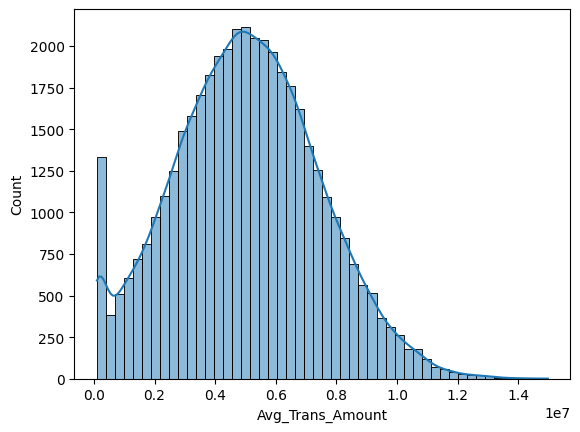

In [13]:
sns.histplot(df['Avg_Trans_Amount'], bins=50, kde=True)


## Analyze Categorical Features

In [14]:
categorical_cols = [
    col for col in df.columns
    if df[col].dtype in [np.int64, np.int32]
    and df[col].nunique() <= 15
]

### Categorical Features Distribution

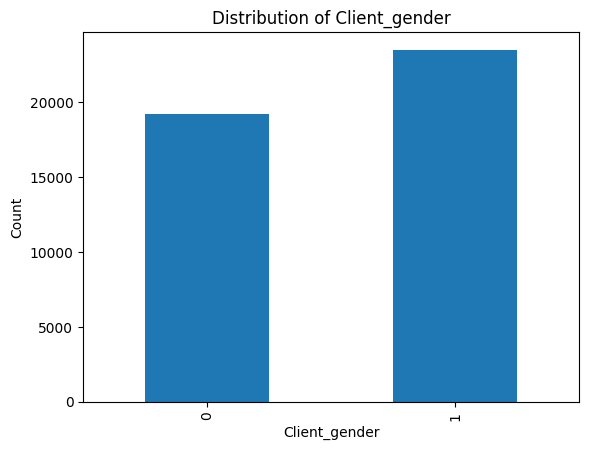

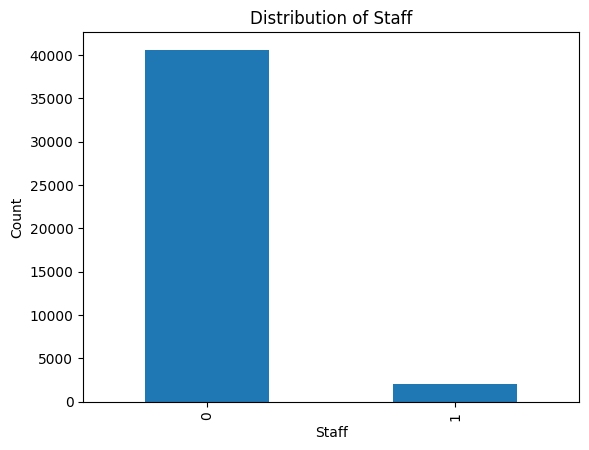

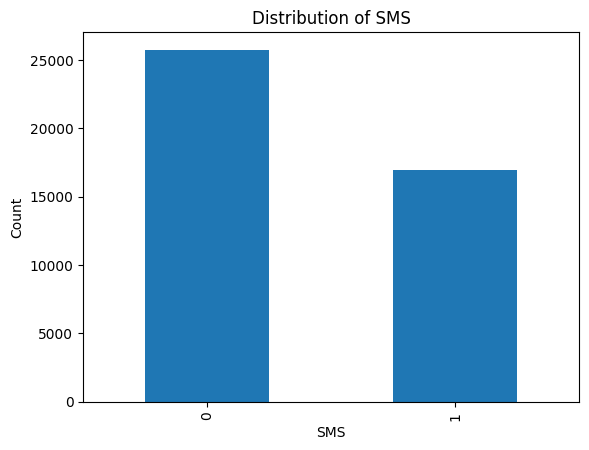

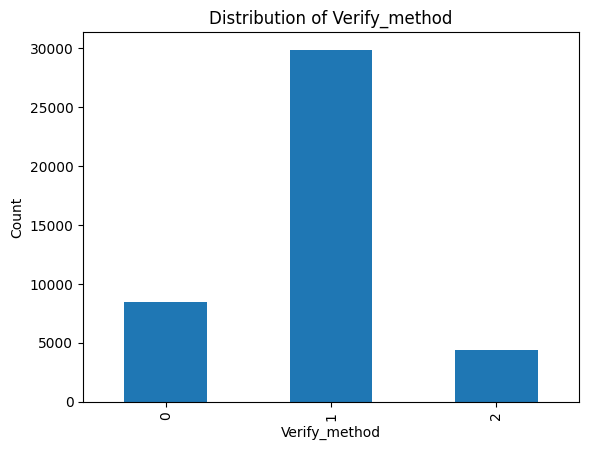

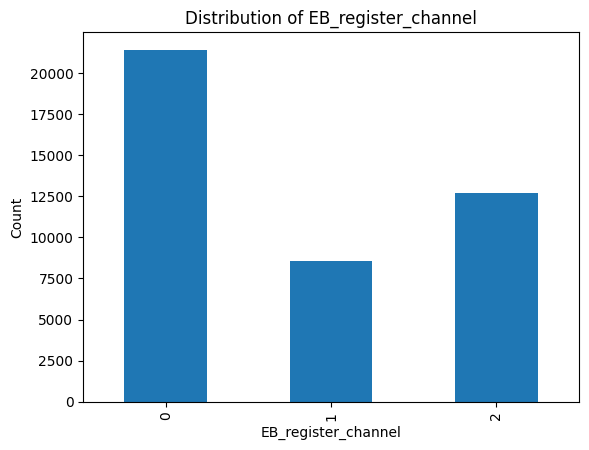

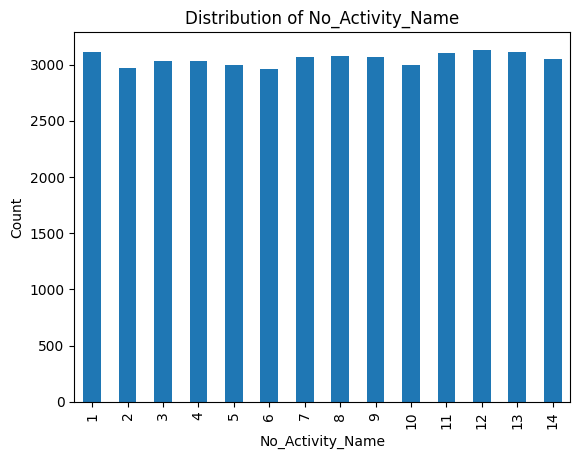

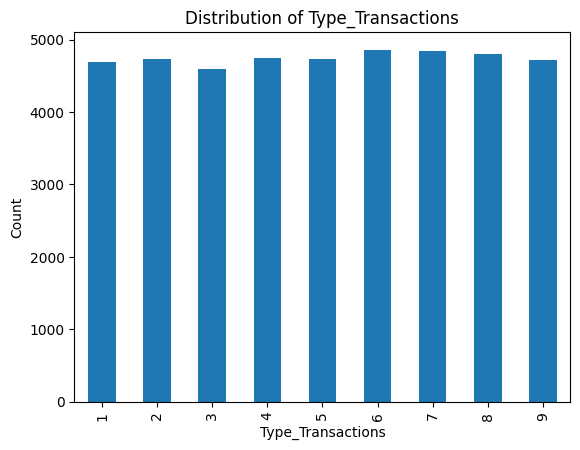

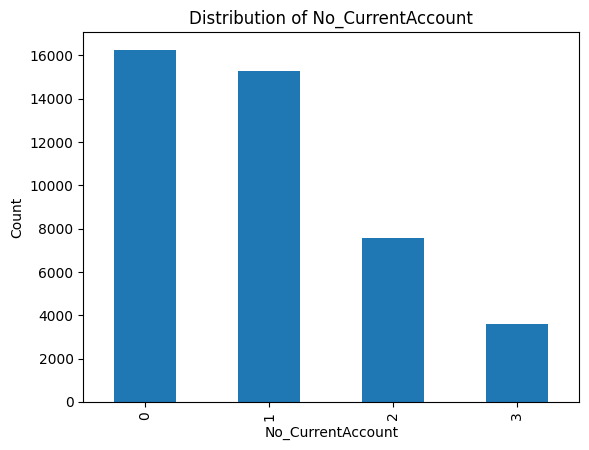

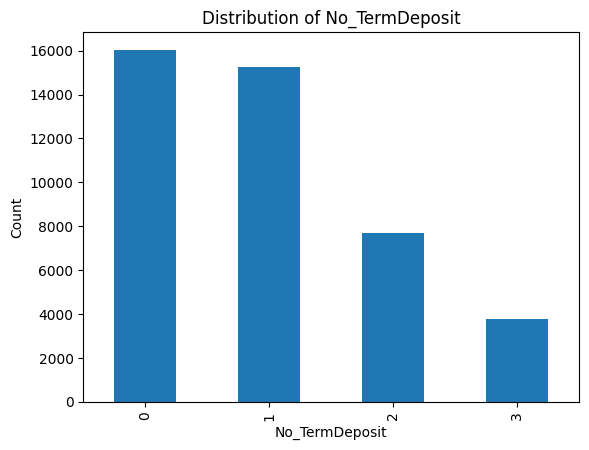

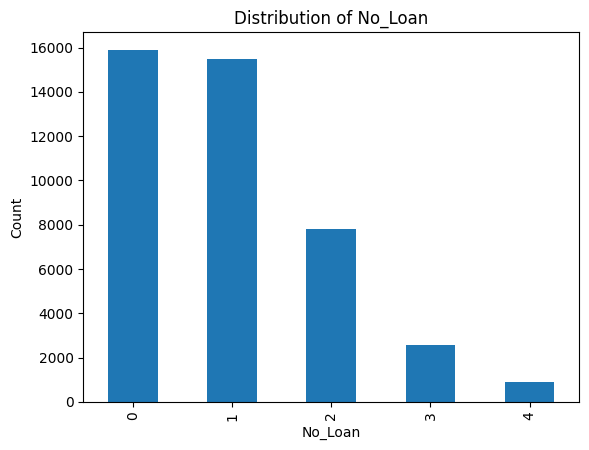

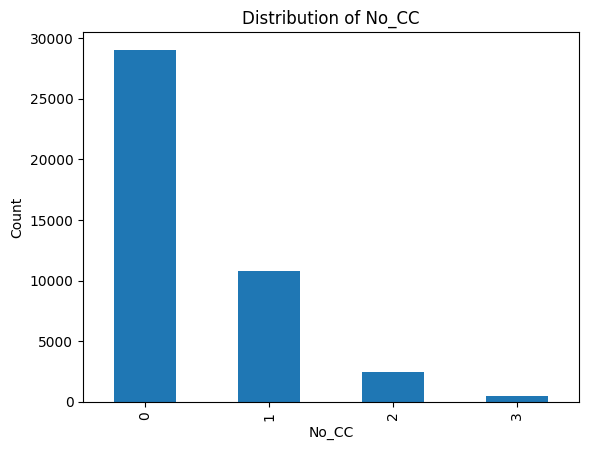

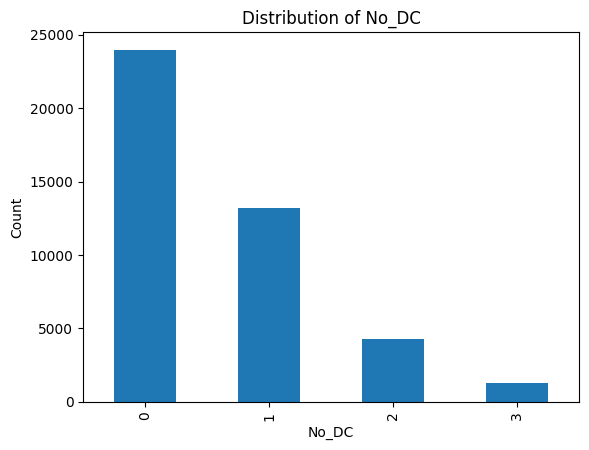

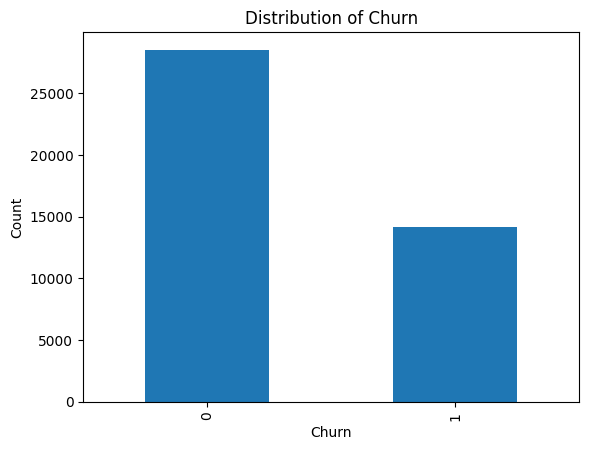

In [15]:
for col in categorical_cols:
    df[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    


### Categorical Data Distribution

In [16]:
for col in categorical_cols:
    print(f"\n=== {col} (Percentage) ===")
    print(
        (df[col].value_counts(normalize=True) * 100)
        .sort_index()
        .round(2)
    )



=== Client_gender (Percentage) ===
Client_gender
0    44.99
1    55.01
Name: proportion, dtype: float64

=== Staff (Percentage) ===
Staff
0    95.05
1     4.95
Name: proportion, dtype: float64

=== SMS (Percentage) ===
SMS
0    60.27
1    39.73
Name: proportion, dtype: float64

=== Verify_method (Percentage) ===
Verify_method
0    19.85
1    69.90
2    10.25
Name: proportion, dtype: float64

=== EB_register_channel (Percentage) ===
EB_register_channel
0    50.13
1    20.07
2    29.79
Name: proportion, dtype: float64

=== No_Activity_Name (Percentage) ===
No_Activity_Name
1     7.29
2     6.96
3     7.10
4     7.11
5     7.02
6     6.93
7     7.18
8     7.20
9     7.17
10    7.01
11    7.26
12    7.33
13    7.29
14    7.15
Name: proportion, dtype: float64

=== Type_Transactions (Percentage) ===
Type_Transactions
1    11.00
2    11.06
3    10.77
4    11.10
5    11.08
6    11.38
7    11.35
8    11.23
9    11.05
Name: proportion, dtype: float64

=== No_CurrentAccount (Percentage) ===
No_C

### Categorical Features Analysis With Target 


=== Client_gender ===


mean      median  count
Client_gender                               
0              5000538.93  4983855.97  19214
1              5040193.50  5011980.30  23497

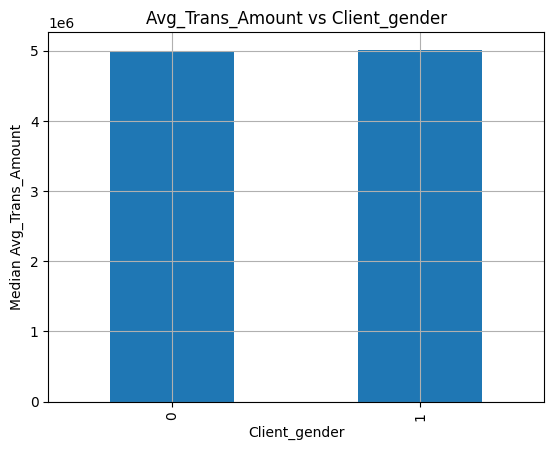


=== Staff ===


mean      median  count
Staff                               
0      5021637.09  4995560.87  40596
1      5036124.10  5094183.61   2115

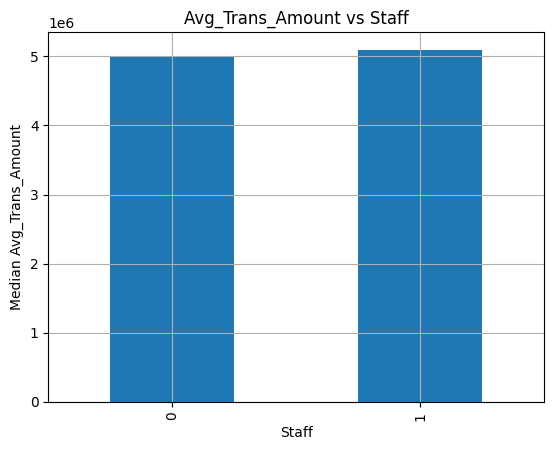


=== SMS ===


mean      median  count
SMS                               
0    5014480.14  4989083.18  25743
1    5034301.00  5021328.68  16968

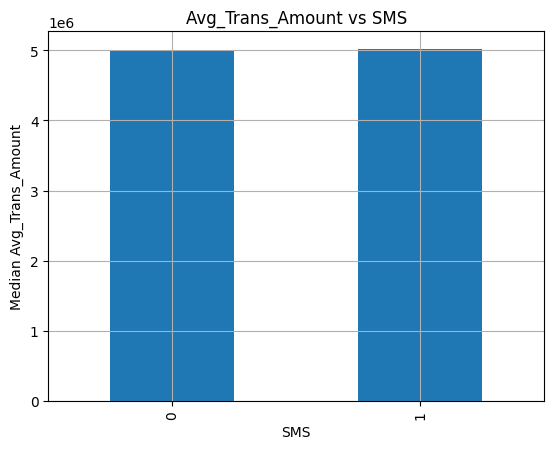


=== Verify_method ===


mean      median  count
Verify_method                               
0              4980588.54  4944065.48   8477
1              5030872.34  5008512.84  29854
2              5045130.07  5074841.12   4380

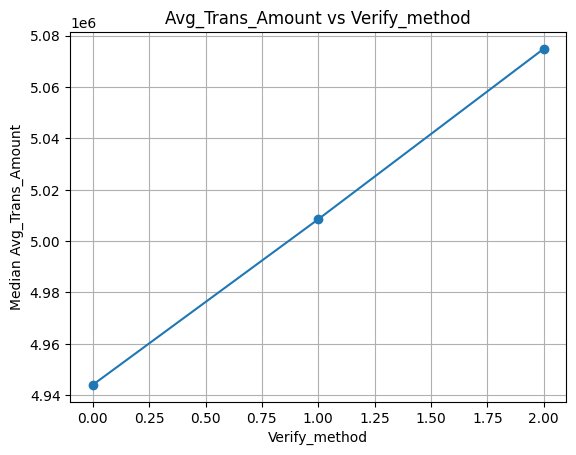


=== EB_register_channel ===


mean      median  count
EB_register_channel                               
0                    5009217.23  4978963.09  21413
1                    5008762.35  4991769.54   8573
2                    5053618.35  5048585.47  12725

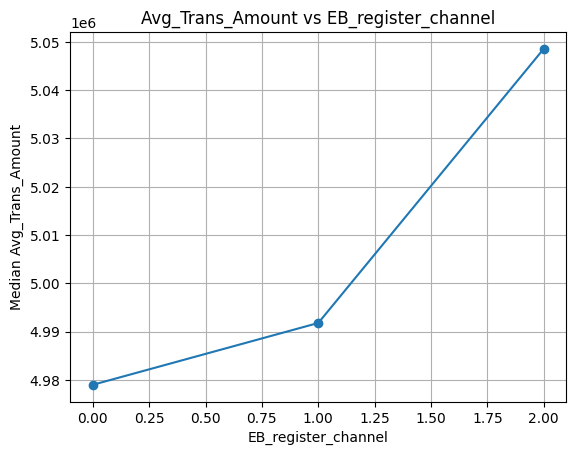


=== No_Activity_Name ===


mean      median  count
No_Activity_Name                               
1                 4977476.84  4959835.60   3113
2                 4967992.11  4977470.18   2973
3                 5013602.70  4982709.30   3034
4                 5058917.60  5071476.38   3035
5                 5094965.79  5056099.05   2999
6                 4967538.13  4903333.54   2959
7                 5005891.95  4991922.26   3068
8                 4940236.21  4976648.71   3075
9                 5037513.24  5076677.30   3064
10                5086378.32  5044690.82   2993
11                5077676.03  5037602.22   3101
12                4952679.14  4945727.99   3131
13                5076501.93  5081981.94   3114
14                5056523.57  4985045.74   3052

<Figure size 640x480 with 0 Axes>

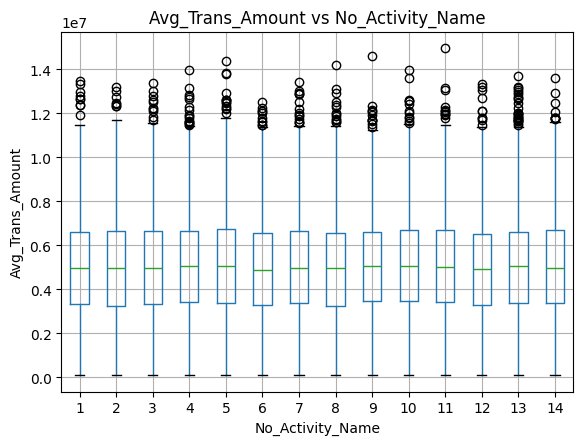


=== Type_Transactions ===


mean      median  count
Type_Transactions                               
1                  5047587.99  5044537.78   4697
2                  5028457.69  4980952.23   4725
3                  4988743.03  4976376.66   4598
4                  4969103.54  4975988.06   4740
5                  5041948.30  5004468.42   4731
6                  5097795.31  5128176.68   4860
7                  4968878.31  4917869.64   4846
8                  5025996.56  4977448.11   4796
9                  5031242.19  4994685.37   4718

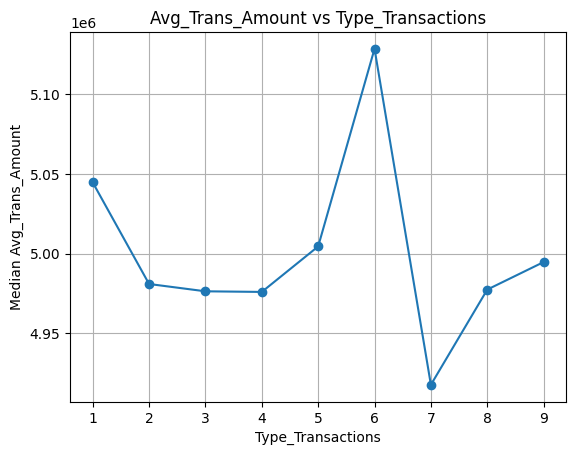


=== No_CurrentAccount ===


mean      median  count
No_CurrentAccount                               
0                  4497705.29  4464165.60  16256
1                  5060704.26  5034301.38  15265
2                  5557736.33  5522912.16   7583
3                  6099007.34  6066892.61   3607

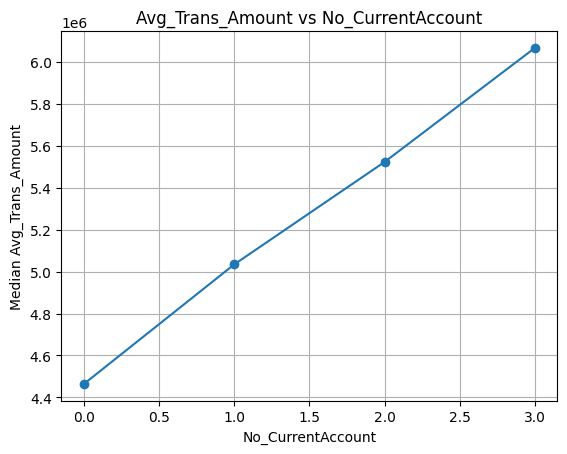


=== No_TermDeposit ===


mean      median  count
No_TermDeposit                               
0               4432095.25  4418364.18  16046
1               5067720.11  5023040.54  15240
2               5582444.54  5547821.47   7674
3               6217181.41  6192562.70   3751

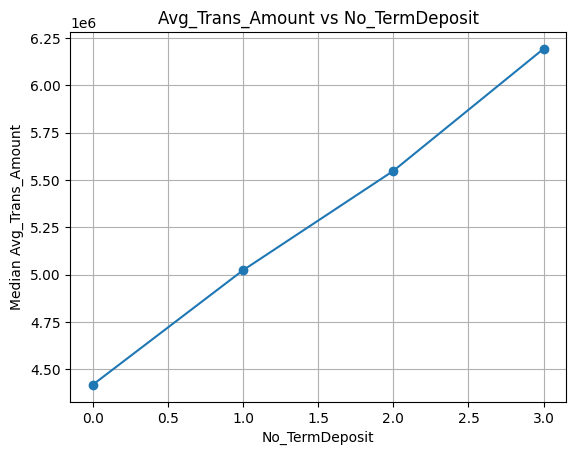


=== No_Loan ===


mean      median  count
No_Loan                               
0        4904389.58  4870784.61  15900
1        5035489.03  5041796.43  15509
2        5133662.51  5109460.65   7804
3        5215124.10  5120410.91   2581
4        5355780.12  5423533.83    917

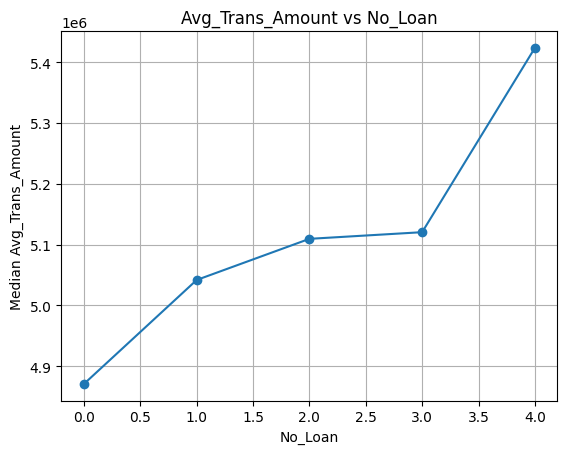


=== No_CC ===


mean      median  count
No_CC                               
0      4935449.81  4912490.88  29033
1      5178378.29  5165271.33  10770
2      5274936.21  5239526.95   2430
3      5501335.09  5624839.47    478

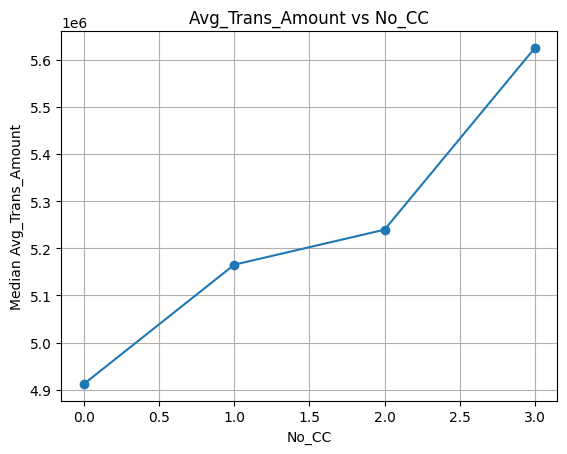


=== No_DC ===


mean      median  count
No_DC                               
0      4902547.63  4880632.42  23972
1      5112828.50  5107142.71  13218
2      5290034.25  5229400.75   4267
3      5448139.25  5416591.47   1254

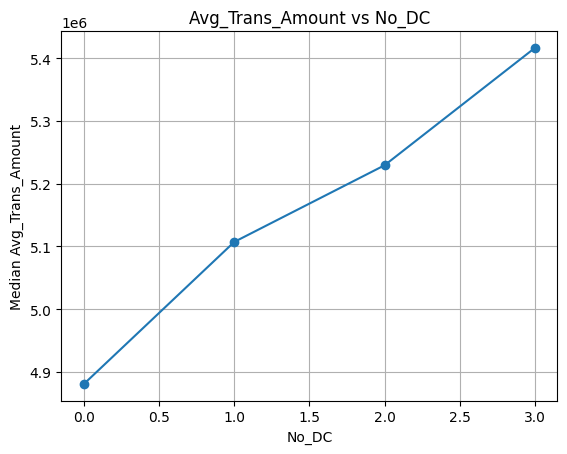


=== Churn ===


mean      median  count
Churn                               
0      5886982.96  5810050.49  28524
1      3283955.71  3233138.31  14187

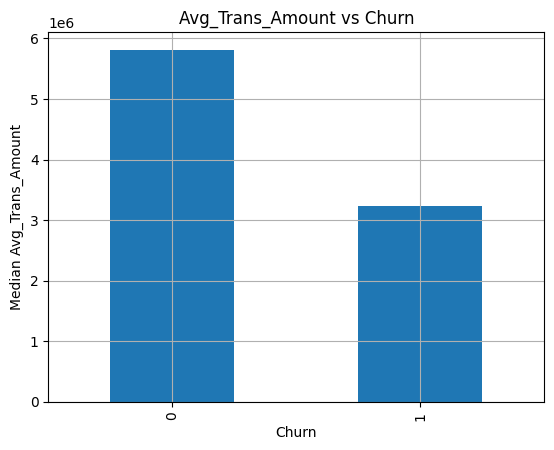

In [18]:
for col in categorical_cols:
    print(f"\n=== {col} ===")

    stats = (
        df.groupby(col)["Avg_Trans_Amount"]
        .agg(["mean", "median", "count"])
    )

    display(stats.round(2))

    # Decide plot type automatically
    n_unique = df[col].nunique()

    plt.figure()

    if n_unique <= 2:
        # Binary → bar plot of median
        stats["median"].plot(kind="bar")
        plt.ylabel("Median Avg_Trans_Amount")

    elif n_unique <= 10:
        # Ordinal small → line plot
        stats["median"].plot(marker="o")
        plt.ylabel("Median Avg_Trans_Amount")

    else:
        # Higher cardinality → boxplot
        df.boxplot(column="Avg_Trans_Amount", by=col)
        plt.suptitle("")
        plt.ylabel("Avg_Trans_Amount")

    plt.title(f"Avg_Trans_Amount vs {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

### Categorical Feature Selection based on Spearman Correlation

In [20]:
for col in categorical_cols:
    corr, p = spearmanr(df[col], df["Avg_Trans_Amount"])

    print(f"{col}: Spearman r = {corr:.3f}, p = {p:.3e}")


Client_gender: Spearman r = 0.008, p = 1.188e-01
Staff: Spearman r = 0.003, p = 5.626e-01
SMS: Spearman r = 0.005, p = 3.415e-01
Verify_method: Spearman r = 0.009, p = 6.060e-02
EB_register_channel: Spearman r = 0.009, p = 5.795e-02
No_Activity_Name: Spearman r = 0.006, p = 2.146e-01
Type_Transactions: Spearman r = -0.001, p = 8.668e-01
No_CurrentAccount: Spearman r = 0.203, p = 0.000e+00
No_TermDeposit: Spearman r = 0.225, p = 0.000e+00
No_Loan: Spearman r = 0.043, p = 1.220e-18
No_CC: Spearman r = 0.053, p = 5.213e-28
No_DC: Spearman r = 0.059, p = 6.592e-34
Churn: Spearman r = -0.510, p = 0.000e+00


### Categorical Feature Selection Based on eta-squared from Kruskal-Wallis Test

In [22]:
def eta_squared_kw(H, k, n):
    return (H - k + 1) / (n - k)

n = len(df)

for col in categorical_cols:
    groups = [df[df[col] == c]["Avg_Trans_Amount"]
              for c in sorted(df[col].unique())]

    if len(groups) > 1:
        H, p = kruskal(*groups)
        eta2 = eta_squared_kw(H, len(groups), n)
        print(f"{col}: eta² = {eta2:.4f}")

Client_gender: eta² = 0.0000
Staff: eta² = -0.0000
SMS: eta² = -0.0000
Verify_method: eta² = 0.0000
EB_register_channel: eta² = 0.0001
No_Activity_Name: eta² = 0.0001
Type_Transactions: eta² = 0.0001
No_CurrentAccount: eta² = 0.0425
No_TermDeposit: eta² = 0.0522
No_Loan: eta² = 0.0018
No_CC: eta² = 0.0028
No_DC: eta² = 0.0035
Churn: eta² = 0.2600


## Analyzing Contiuous Features

In [24]:
target = "Avg_Trans_Amount"   # change this
features = [col for col in df.columns if col != target]




In [25]:
corr_target = df[features + [target]].corr()[target].drop(target)
corr_target = corr_target.sort_values(ascending=False)

print(corr_target)

Avg_CurrentAccount_Balance    0.737704
Max_CurrentAccount_Balance    0.722899
Avg_TermDeposit_Balance       0.648435
Avg_Loan_Balance              0.648090
Max_Loan_Balance              0.631412
Max_TermDeposit_Balance       0.626343
Avg_Trans_no_month            0.610578
Min_CurrentAccount_Balance    0.610223
Tenure                        0.565746
Min_Loan_Balance              0.559957
Min_TermDeposit_Balance       0.527433
No_TermDeposit                0.232561
No_CurrentAccount             0.209566
No_DC                         0.063034
No_CC                         0.053965
No_Loan                       0.045580
Client_gender                 0.008206
Verify_method                 0.008181
EB_register_channel           0.007597
No_Activity_Name              0.006987
Age                           0.005893
Customer_number               0.004504
SMS                           0.004034
Staff                         0.001307
Type_Transactions             0.000262
Churn                    

### Features Analysis With Target

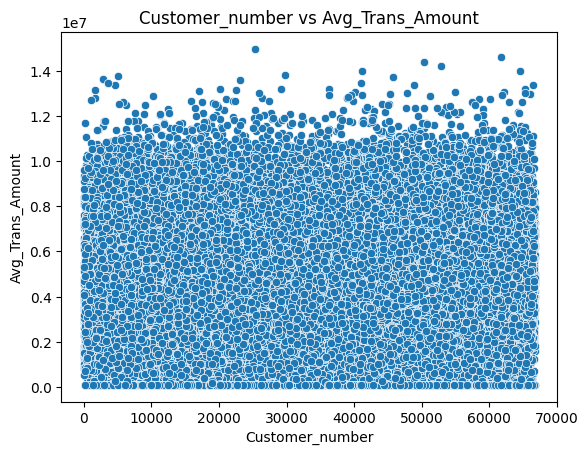

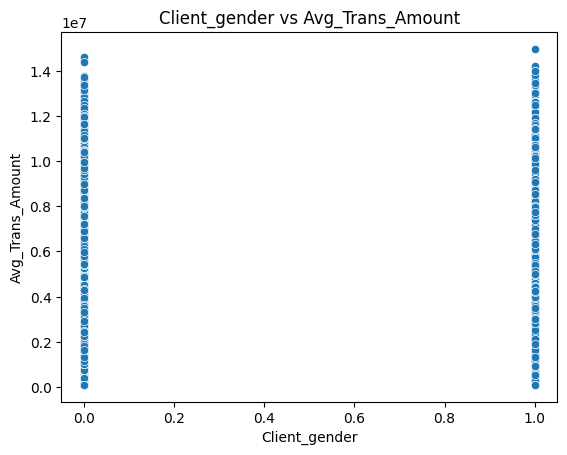

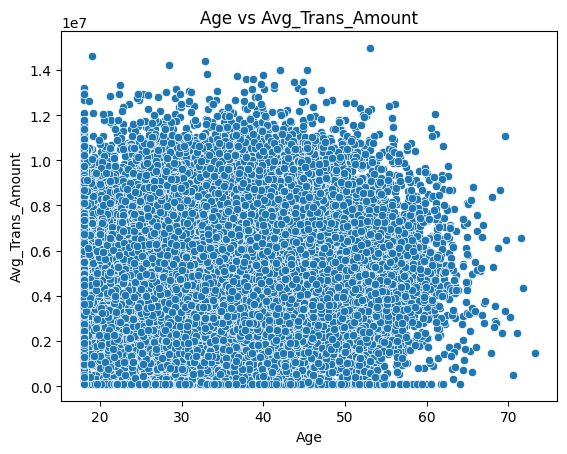

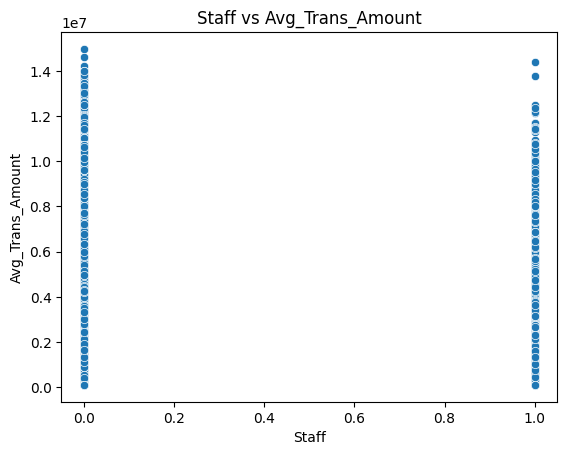

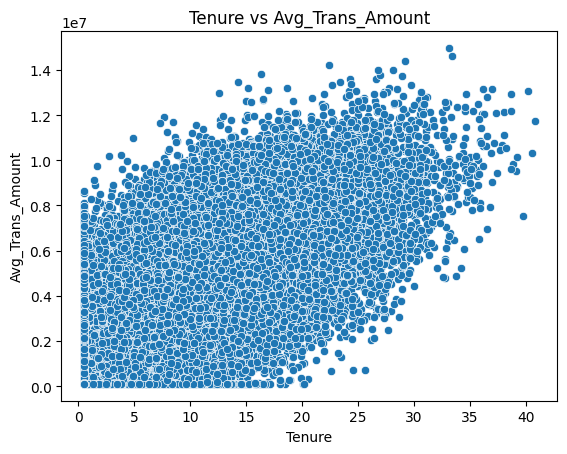

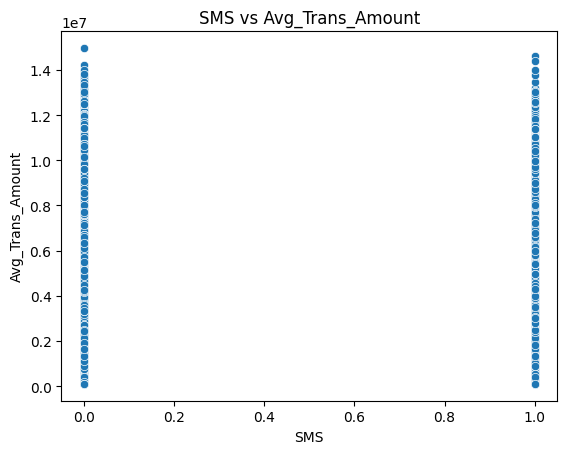

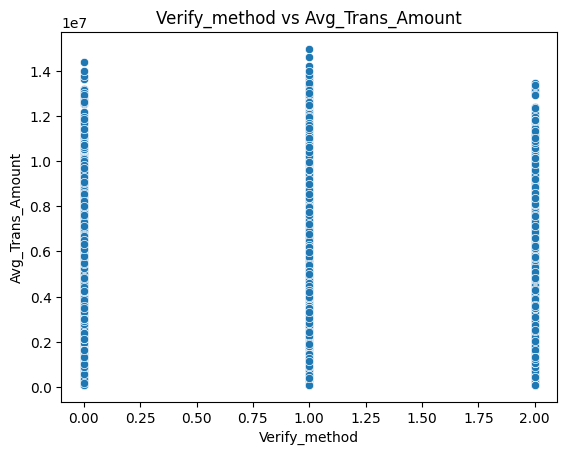

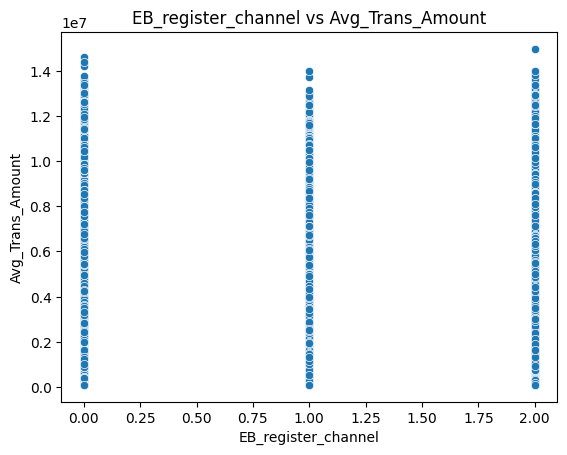

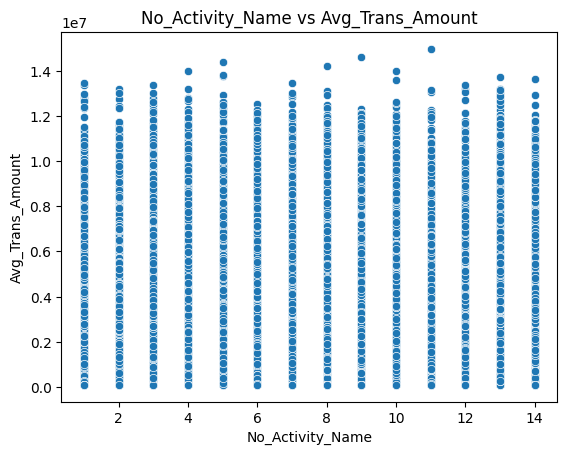

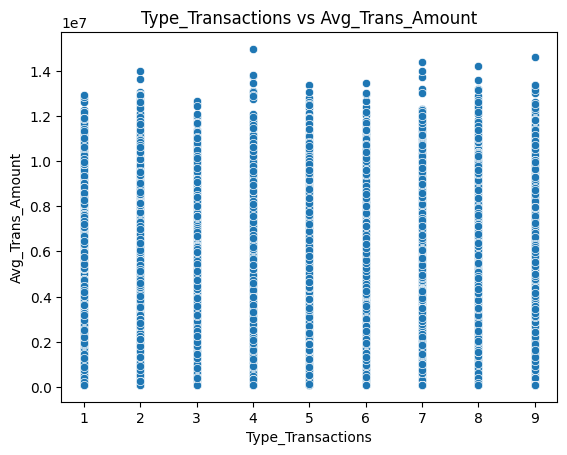

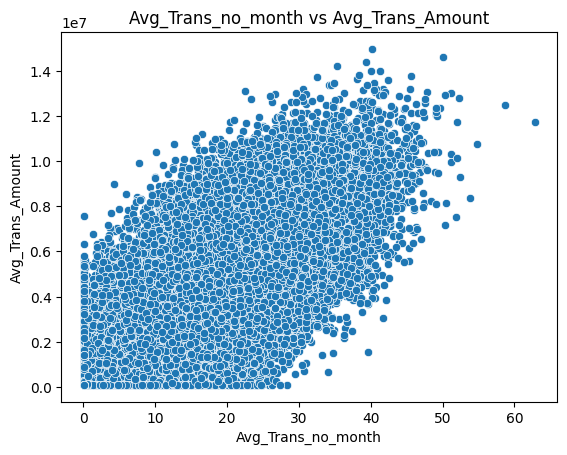

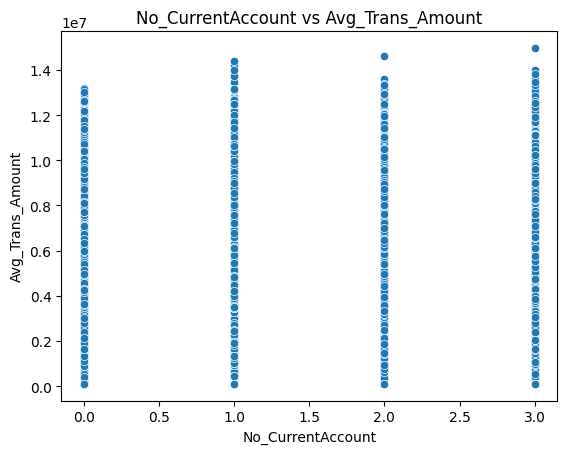

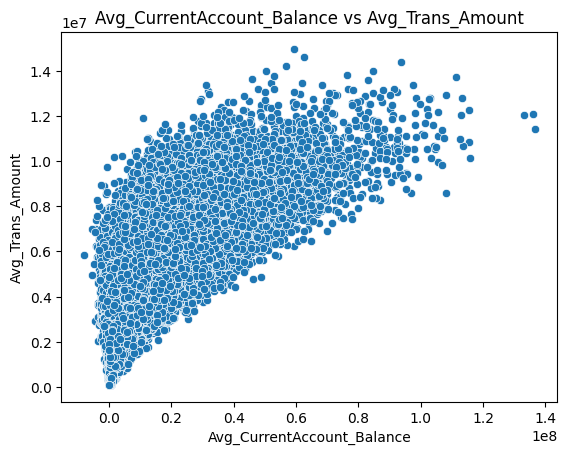

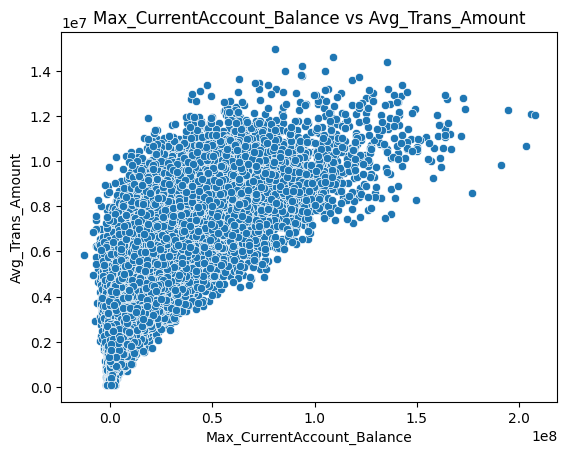

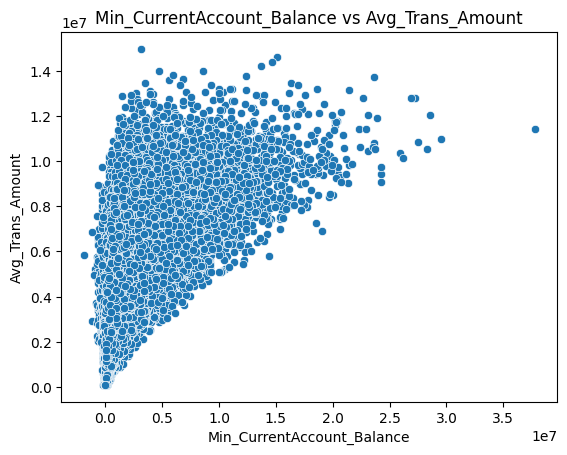

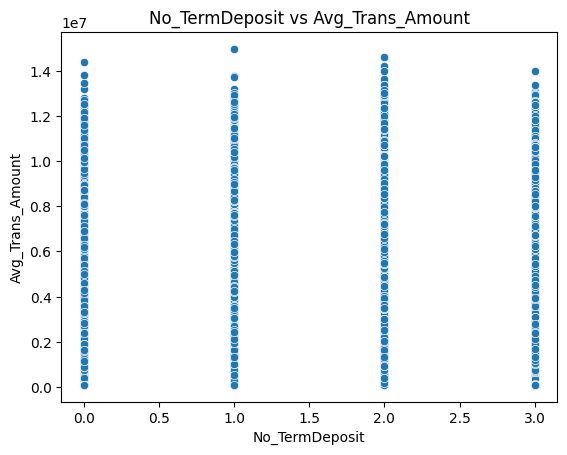

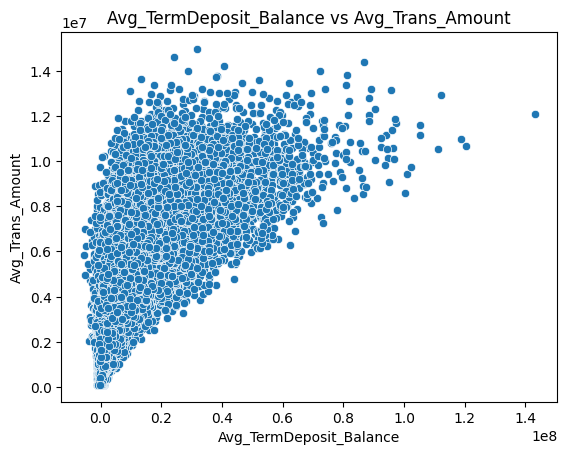

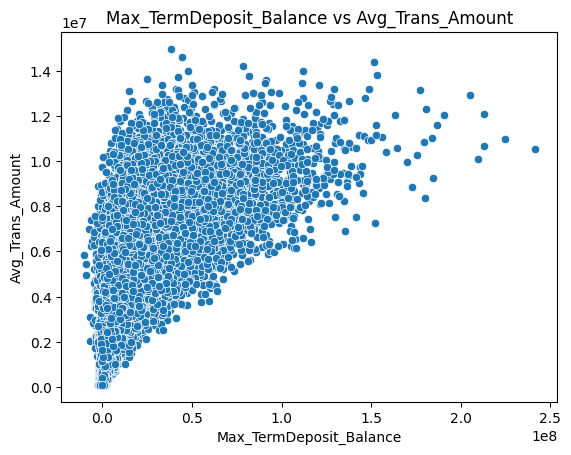

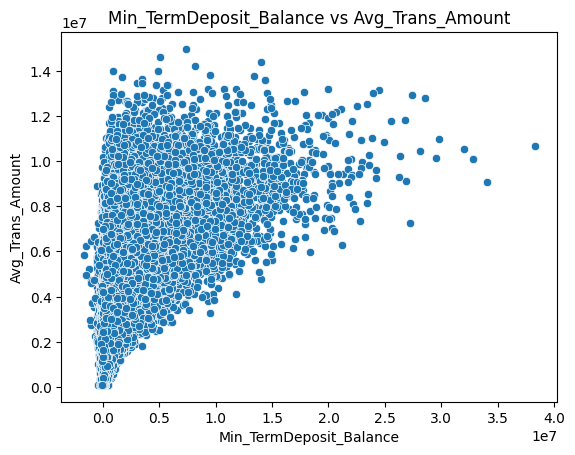

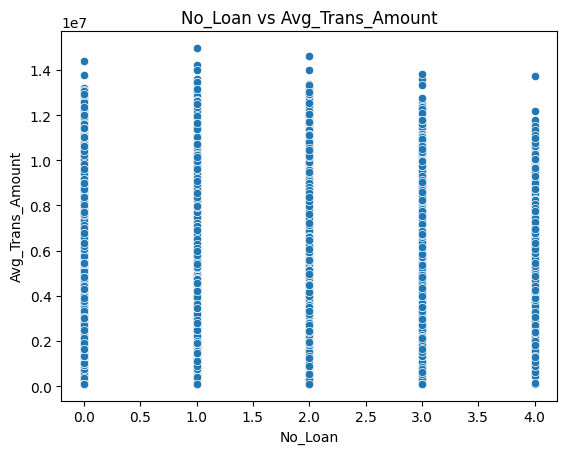

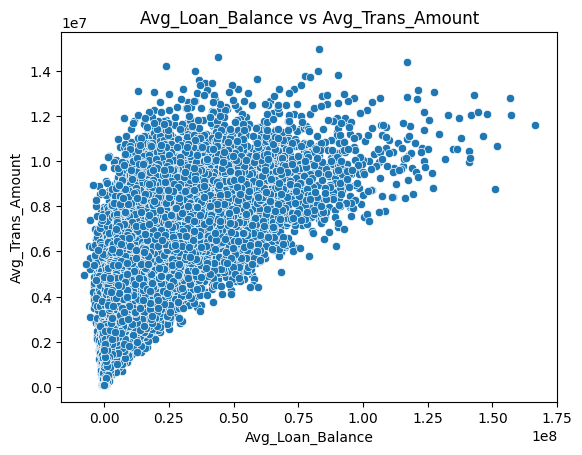

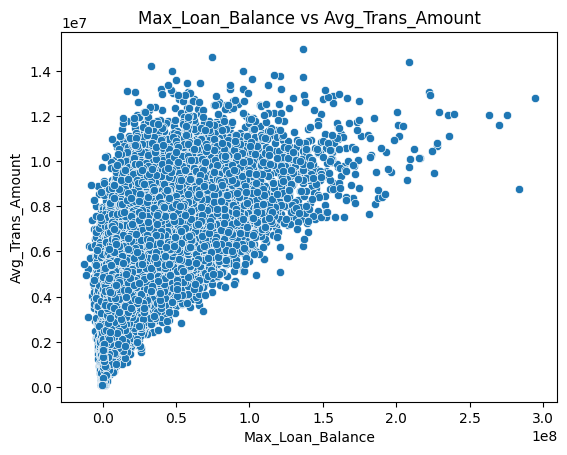

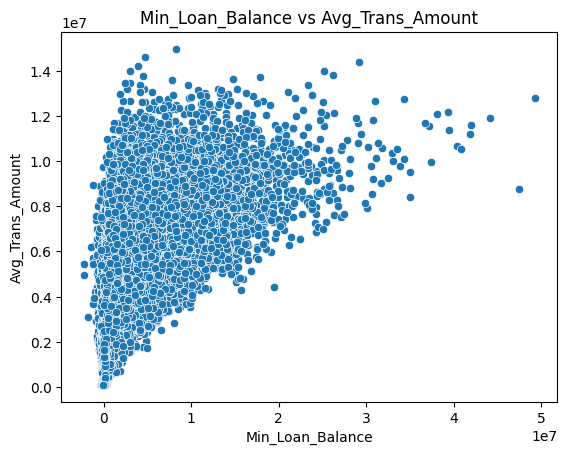

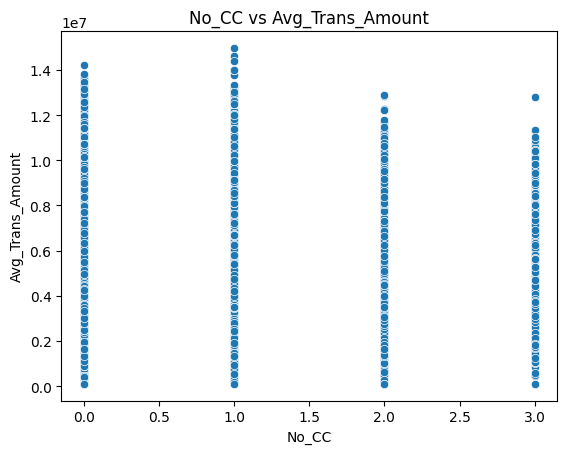

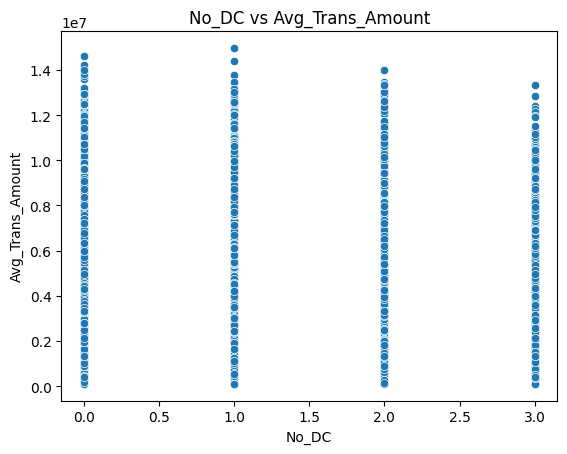

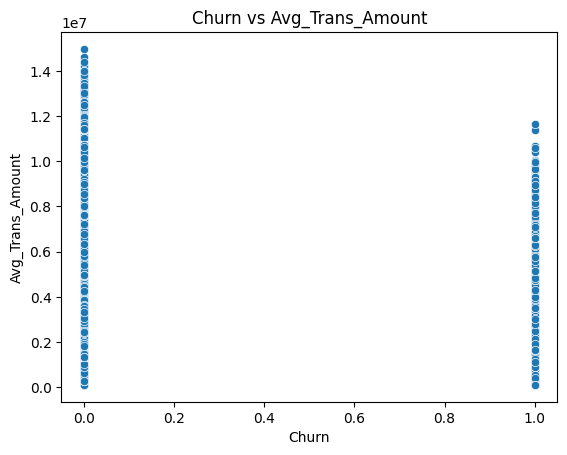

In [26]:
for feature in features:
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


### Features and Target Analysis with Line Plot

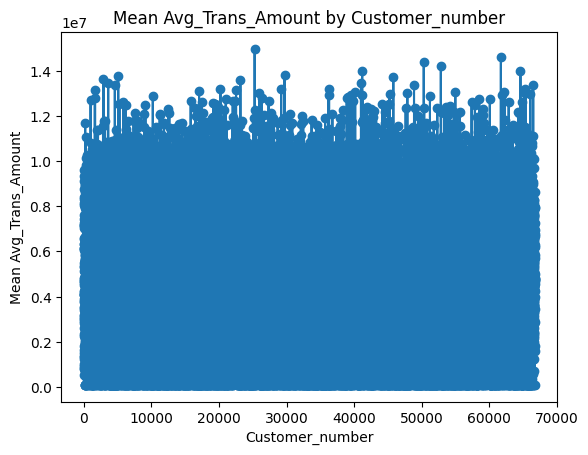

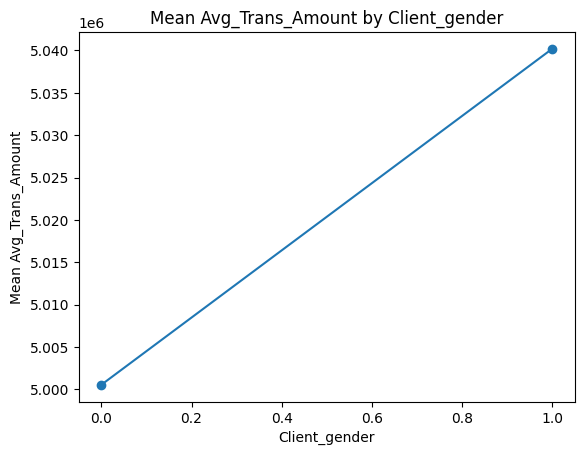

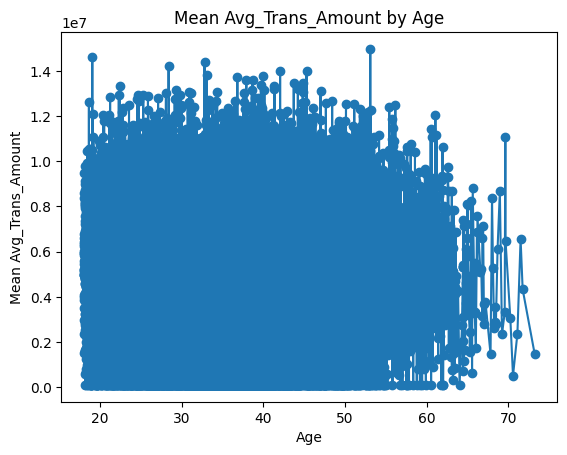

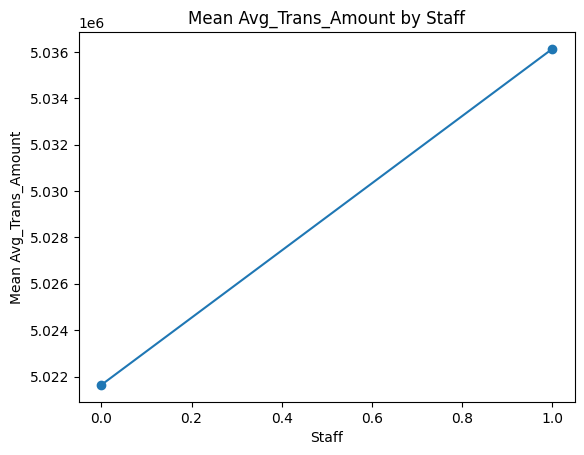

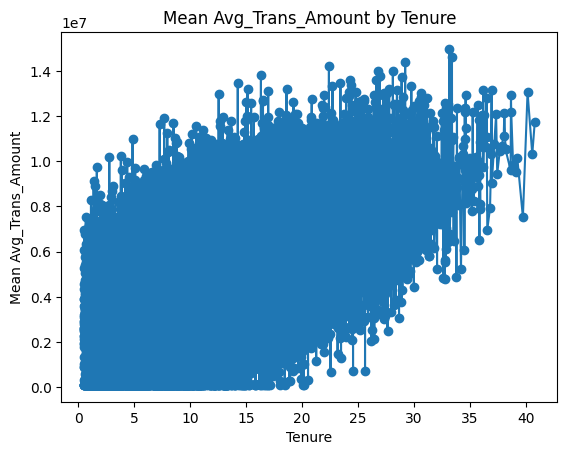

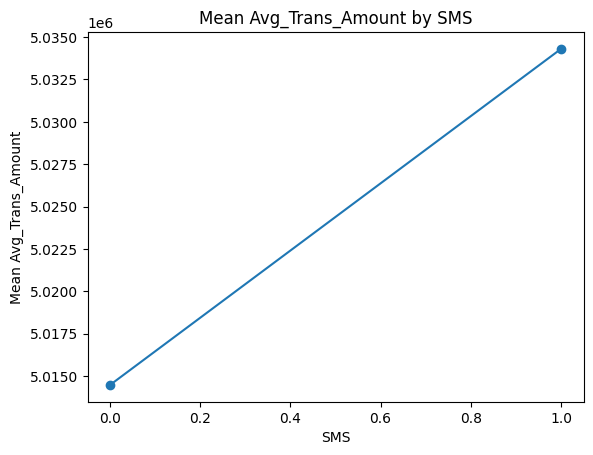

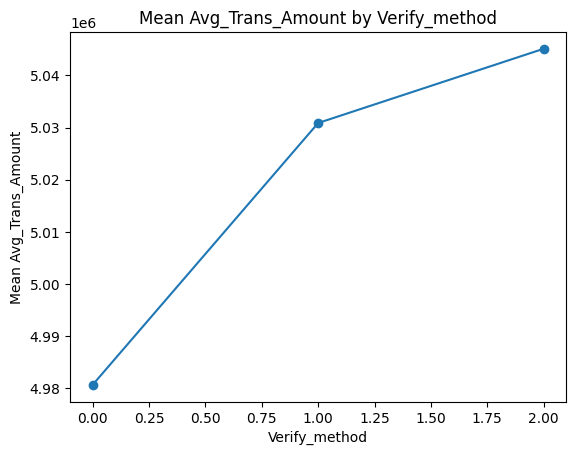

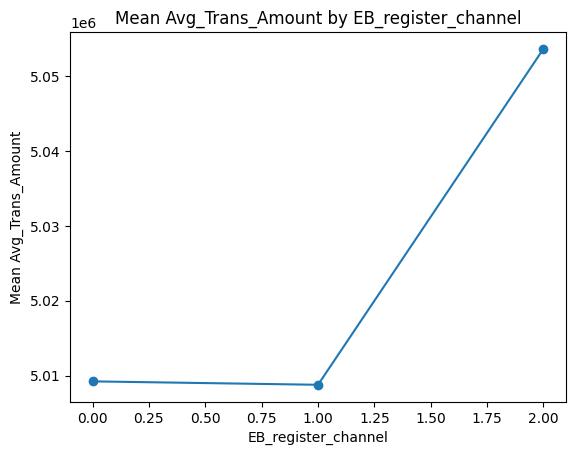

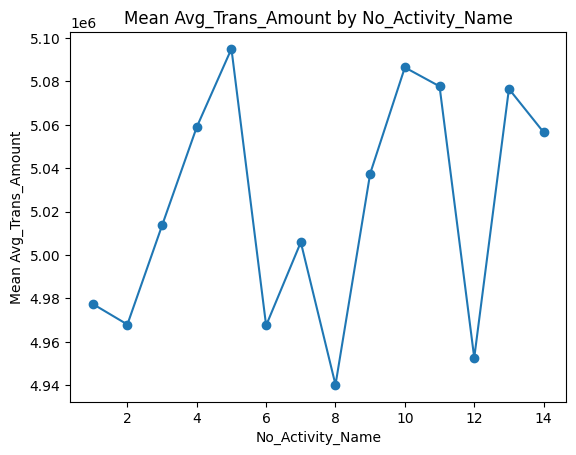

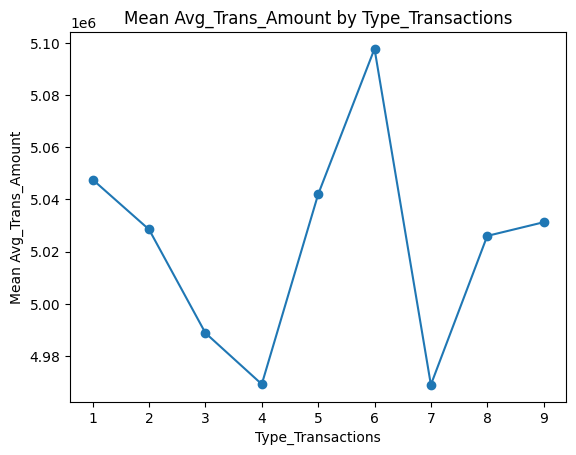

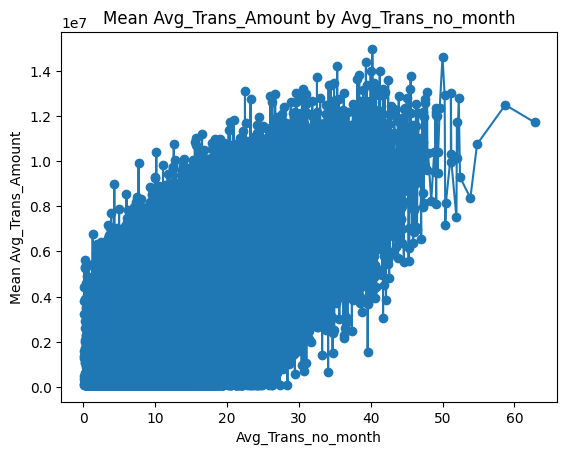

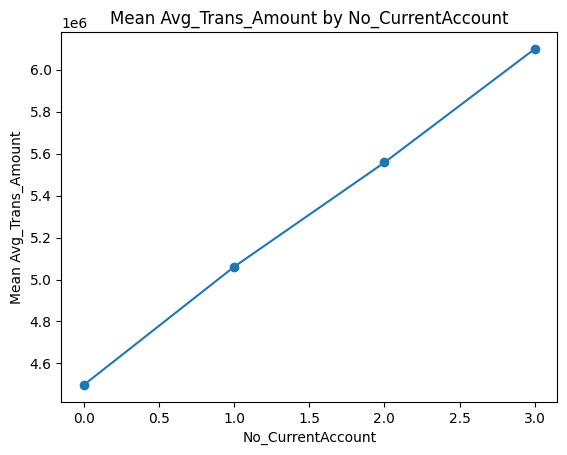

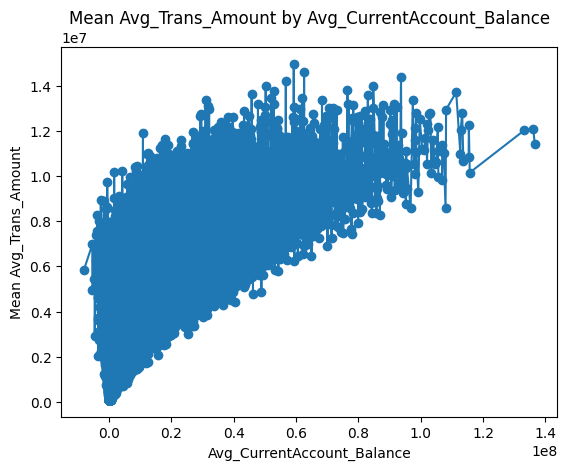

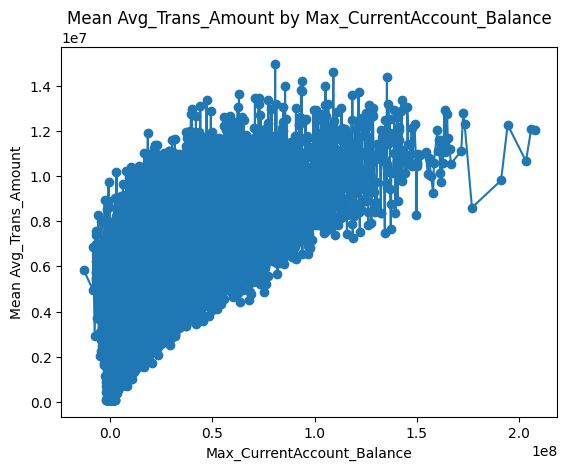

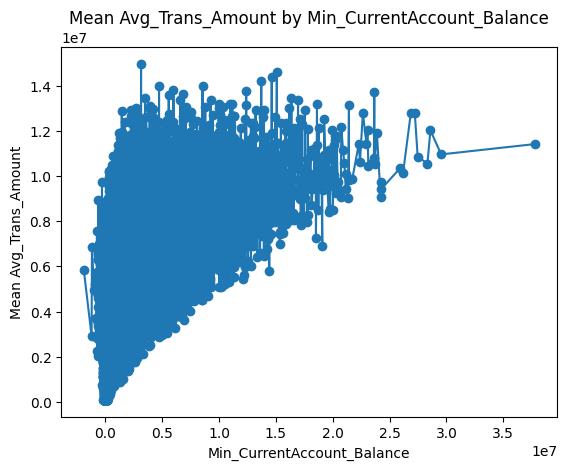

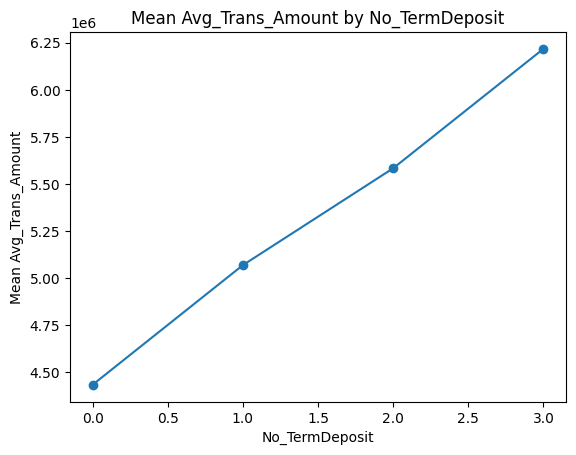

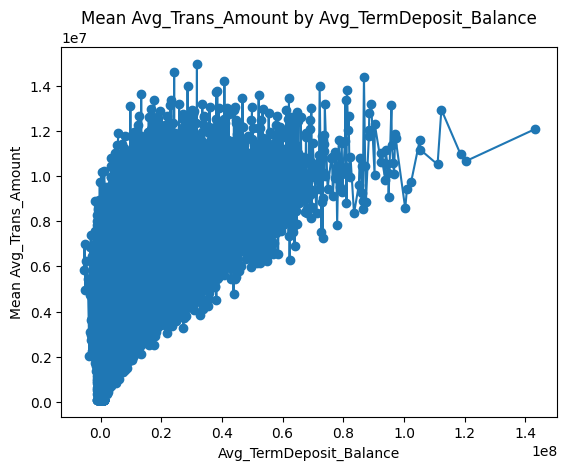

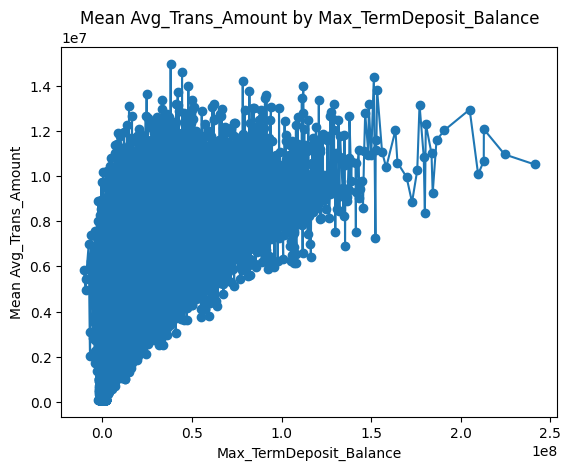

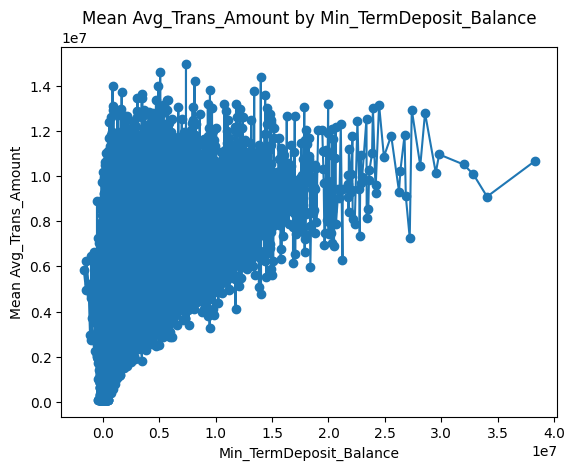

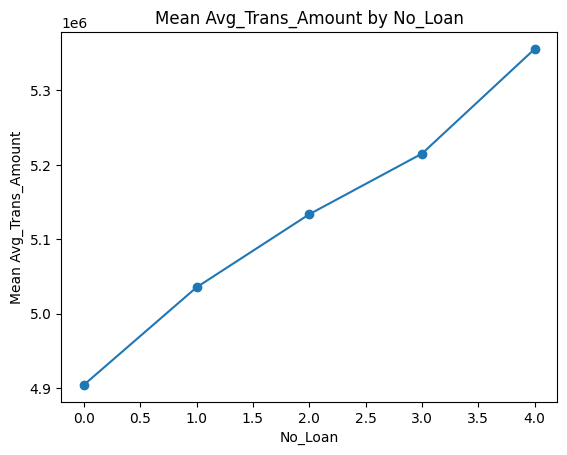

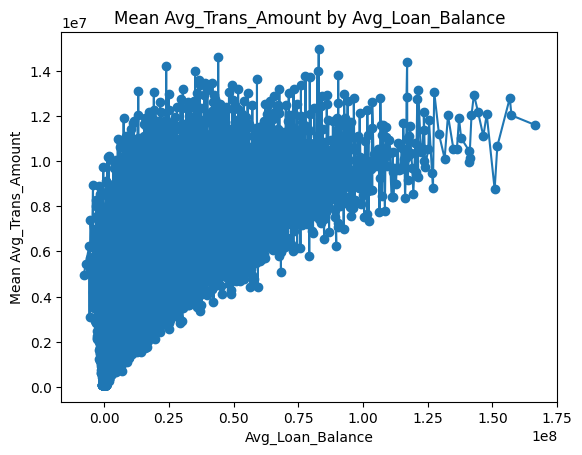

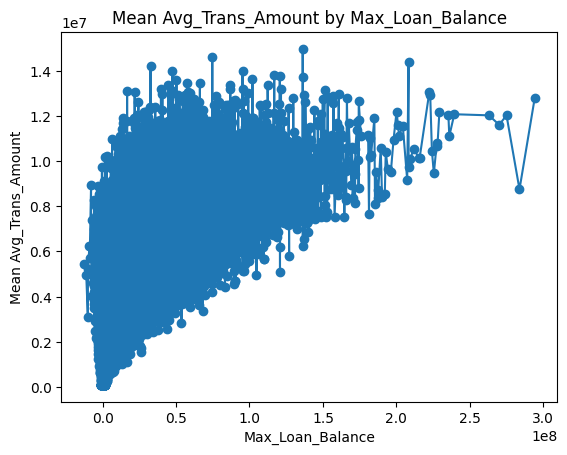

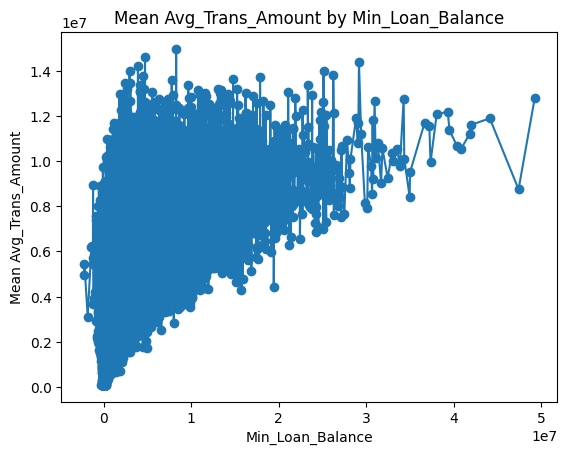

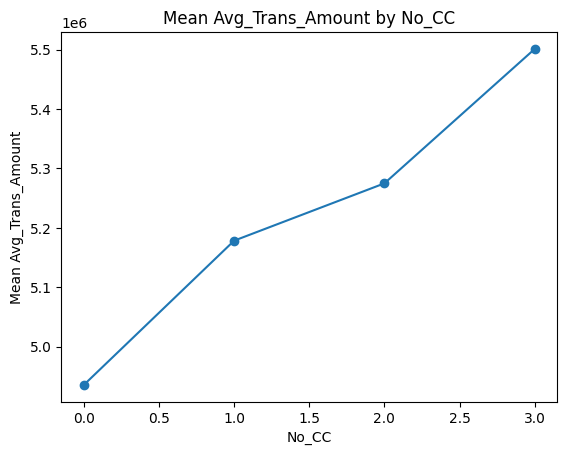

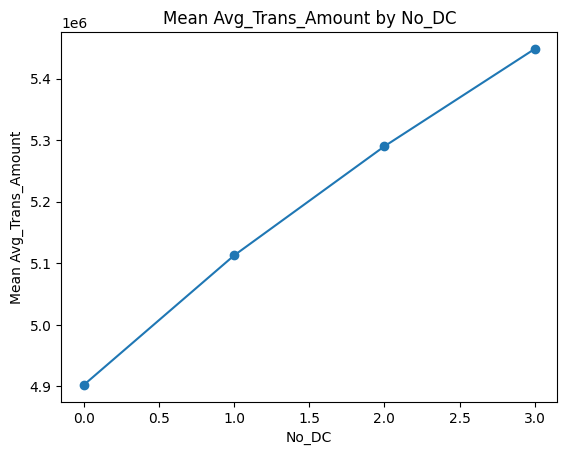

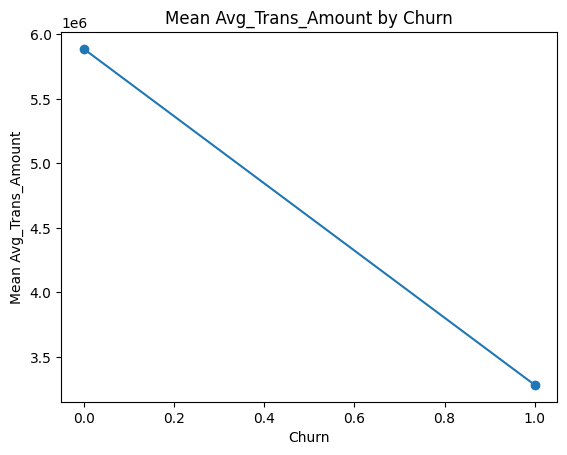

In [27]:
for feature in features:
    grouped = df.groupby(feature)[target].mean()

    grouped.plot(marker="o")
    plt.title(f"Mean {target} by {feature}")
    plt.xlabel(feature)
    plt.ylabel(f"Mean {target}")
    plt.show()


### Checking Correlations with Target Variable

In [28]:
high_relevant = corr_target[
    (corr_target.abs() >= 0.55) & (corr_target.index != "Churn")
].index.tolist()

low_relevant = corr_target[
    (corr_target.abs() <= 0.05)
].index.tolist()

print("High relevant features:", high_relevant)
print("Low relevant features:", low_relevant)

High relevant features: ['Avg_CurrentAccount_Balance', 'Max_CurrentAccount_Balance', 'Avg_TermDeposit_Balance', 'Avg_Loan_Balance', 'Max_Loan_Balance', 'Max_TermDeposit_Balance', 'Avg_Trans_no_month', 'Min_CurrentAccount_Balance', 'Tenure', 'Min_Loan_Balance']
Low relevant features: ['No_Loan', 'Client_gender', 'Verify_method', 'EB_register_channel', 'No_Activity_Name', 'Age', 'Customer_number', 'SMS', 'Staff', 'Type_Transactions']


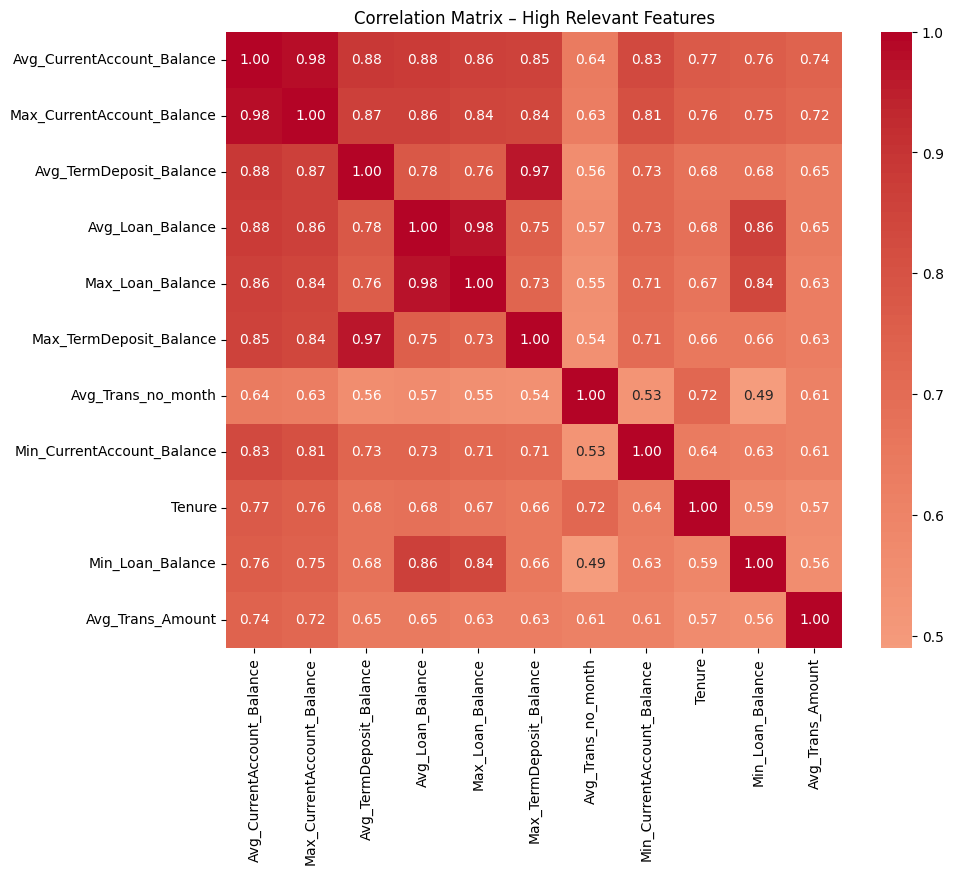

In [29]:
high_cols = high_relevant + [target]

corr_high = df[high_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_high,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Matrix – High Relevant Features")
plt.show()


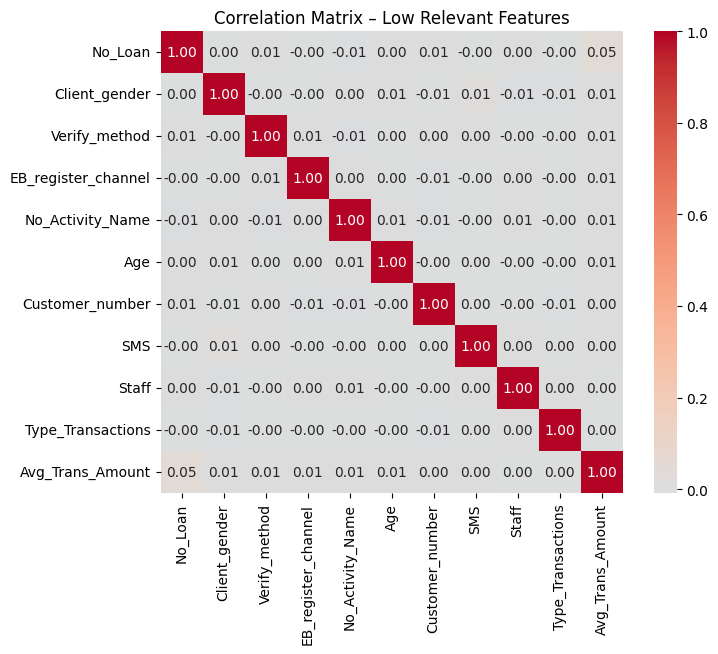

In [30]:
low_cols = low_relevant + [target]

corr_low = df[low_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_low,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Matrix – Low Relevant Features")
plt.show()


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(df[features], df[target])

importance = pd.Series(rf.feature_importances_, index=features)



In [32]:
print(importance)

Customer_number               0.017983
Client_gender                 0.002015
Age                           0.017876
Staff                         0.000859
Tenure                        0.057643
SMS                           0.001941
Verify_method                 0.002895
EB_register_channel           0.003322
No_Activity_Name              0.010622
Type_Transactions             0.008581
Avg_Trans_no_month            0.036812
No_CurrentAccount             0.008462
Avg_CurrentAccount_Balance    0.673500
Max_CurrentAccount_Balance    0.026703
Min_CurrentAccount_Balance    0.017892
No_TermDeposit                0.009293
Avg_TermDeposit_Balance       0.013983
Max_TermDeposit_Balance       0.014183
Min_TermDeposit_Balance       0.016586
No_Loan                       0.004855
Avg_Loan_Balance              0.013537
Max_Loan_Balance              0.014043
Min_Loan_Balance              0.016164
No_CC                         0.003028
No_DC                         0.003832
Churn                    

# Outlier Check

In [33]:
outlier_summary = []

for col in features:  # features = all columns except target
    if not np.issubdtype(df[col].dtype, np.number):
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_pct = outlier_count / len(df) * 100

    outlier_summary.append({
        "feature": col,
        "outlier_count": outlier_count,
        "outlier_pct": round(outlier_pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values("outlier_pct", ascending=False)
outlier_df


feature  outlier_count  outlier_pct
6                Verify_method          12857        30.10
18     Min_TermDeposit_Balance           3122         7.31
22            Min_Loan_Balance           2957         6.92
14  Min_CurrentAccount_Balance           2526         5.91
17     Max_TermDeposit_Balance           2514         5.89
21            Max_Loan_Balance           2449         5.73
16     Avg_TermDeposit_Balance           2400         5.62
20            Avg_Loan_Balance           2381         5.57
3                        Staff           2115         4.95
13  Max_CurrentAccount_Balance           1996         4.67
12  Avg_CurrentAccount_Balance           1919         4.49
24                       No_DC           1254         2.94
4                       Tenure            569         1.33
23                       No_CC            478         1.12
10          Avg_Trans_no_month            184         0.43
2                          Age            141         0.33
19                     No_Loan              0         0.00
0              Customer_number              0         0.00
15              No_TermDeposit              0         0.00
1                Client_gender              0         0.00
11           No_CurrentAccount              0         0.00
9            Type_Transactions              0         0.00
8             No_Activity_Name              0         0.00
7          EB_register_channel              0         0.00
5                          SMS              0         0.00
25                       Churn              0         0.00

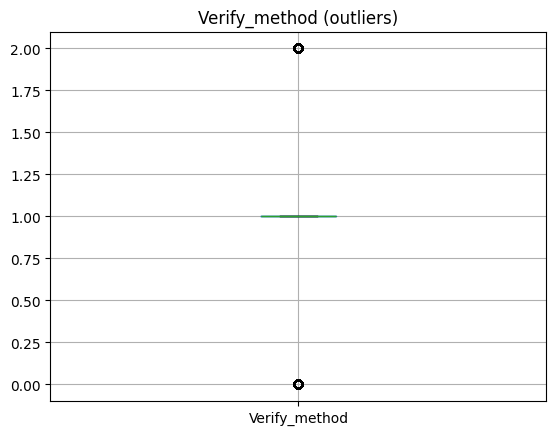

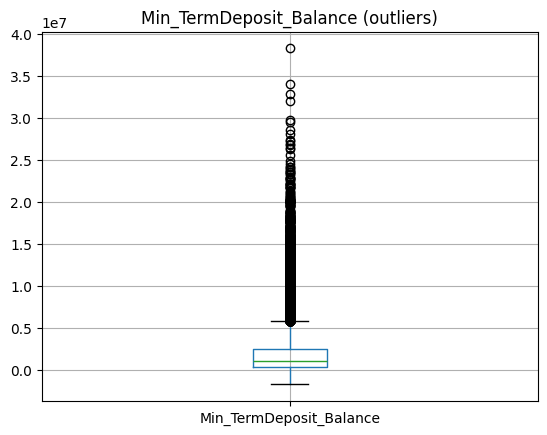

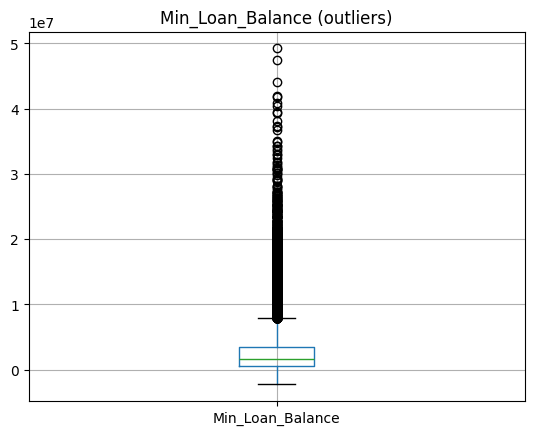

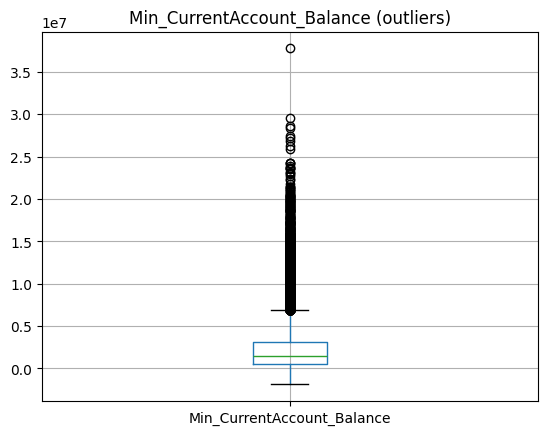

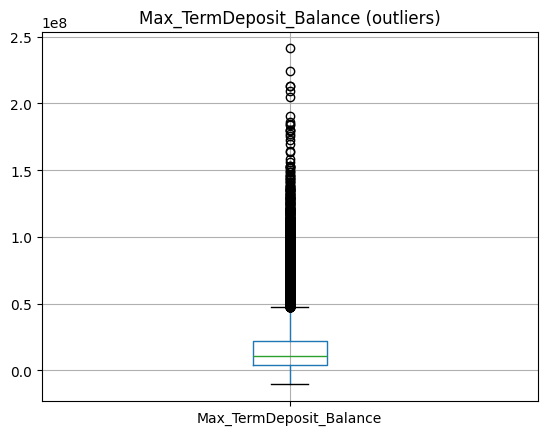

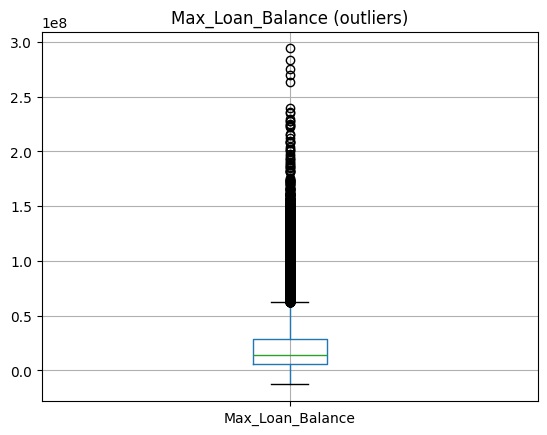

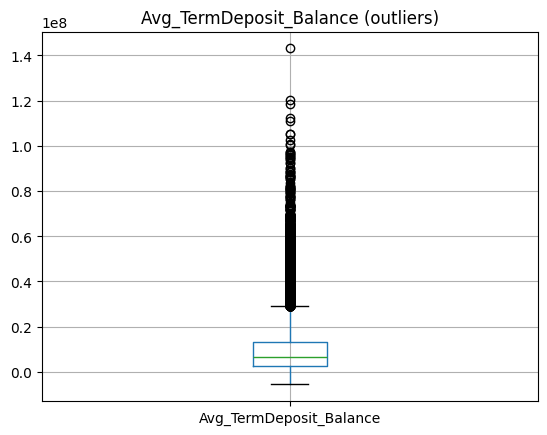

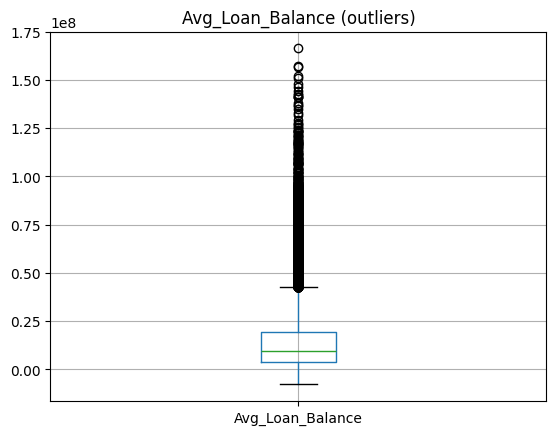

In [34]:
for col in outlier_df.loc[outlier_df["outlier_pct"] > 5, "feature"]:
    df[[col]].boxplot()
    plt.title(f"{col} (outliers)")
    plt.show()


# Training Model

In [59]:
FEATURES = [
    "Tenure",
    "Avg_Trans_no_month",
    "No_CurrentAccount",
    "Avg_CurrentAccount_Balance",
    "No_TermDeposit",
    "Avg_TermDeposit_Balance",
    "Avg_Loan_Balance",
    "Churn",
    #"Age",
    "No_Activity_Name",
    "Verify_method",
    "Client_gender",
    #"Staff",
    #"SMS",
    "EB_register_channel",
    "Type_Transactions",
    #"Max_CurrentAccount_Balance"
    "No_Loan",
    "No_DC"
]

TARGET = "Avg_Trans_Amount"


In [65]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [66]:
gbr_best = GradientBoostingRegressor(
    subsample=0.6,
    n_estimators=500,
    min_samples_leaf=20,
    max_depth=4,
    learning_rate=0.03,
    random_state=42
)


In [67]:
gbr_best.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.03, max_depth=4, min_samples_leaf=20,
                          n_estimators=500, random_state=42, subsample=0.6)

In [68]:
y_pred = gbr_best.predict(X_test)


In [69]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R²: 0.7237
RMSE: 1259556.4421
MAE: 988474.8136
